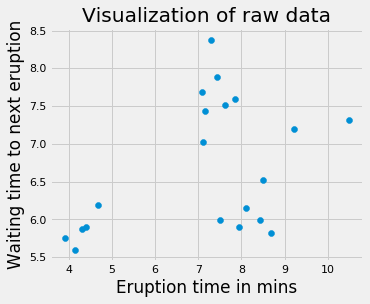

In [34]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_excel("/Users/aalikberov002/Desktop/Book1.xlsx")

# Plot the data
plt.figure(figsize=(5, 4
                ))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');


In [35]:
X

,x,y
0,3.91,5.76
1,7.09,7.69
2,10.48,7.32
3,9.21,7.20
4,7.95,5.90
5,4.30,5.88
6,7.62,7.51
7,8.42,5.99
8,7.15,7.43
9,4.69,6.19


In [55]:
from sklearn.cluster import KMeans
X=df
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

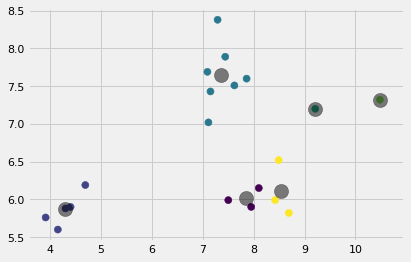

In [56]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

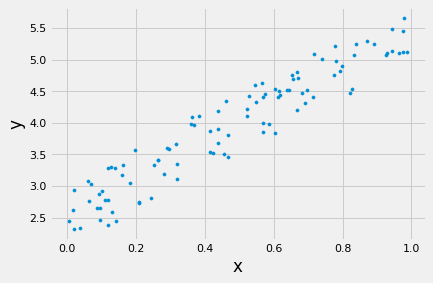

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

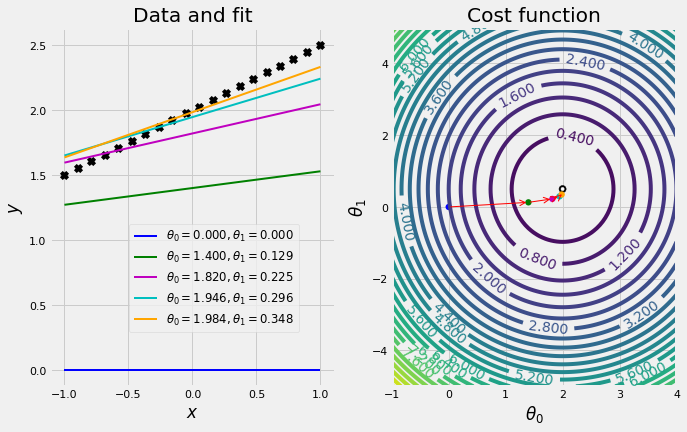

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

# Regression 

In [404]:
##https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Linear-Regression-Part-3-965/

import pandas as pd  # data handeling
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools
%matplotlib inline
sns.set()

In [412]:
# some simple random (close to linear) data
##x = np.linspace(0,5,5)
x = np.array([62.7, 65.4, 78.9, 85.6, 94.1, 102.9, 124.8])
#x = [45.4, 58.2, 62.7, 74.5, 85.6, 94.1, 124.8]
#y = np.linspace(0,5,5) + 1 + np.random.randn(5)
##y = [ 0.21378624, 1.97217916, 2.36737375, 5.13718724, 6.26470731]
y = [48.53, 40.32, 63.84, 77.65, 100.02, 113.22, 133.15] #in 100.000

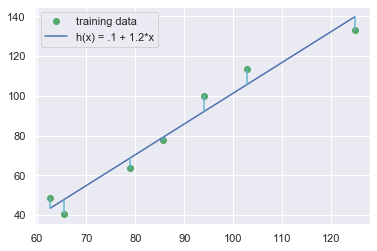

In [413]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -53.69 + 1.55*x, label='h(x) = .1 + 1.2*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [-53.69 + 1.55*x[i],y[i]], '-', color='c')
plt.legend();

In [414]:
x

array([ 62.7,  65.4,  78.9,  85.6,  94.1, 102.9, 124.8])

In [415]:
y

[48.53, 40.32, 63.84, 77.65, 100.02, 113.22, 133.15]

In [416]:
x=x.reshape((-1, 1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

In [417]:
reg.coef_

array([1.55038628])

In [418]:
reg.intercept_

-53.68961826158382

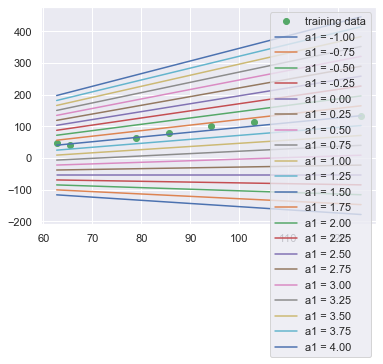

In [425]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
a1 = np.linspace(-1,4,21) #coefficient - should be the range -10 +10 from a real one
for i in range(len(a1)):
    ax.plot(x, -53.69 + a1[i]*x, label='a1 = %.2f' %a1[i] )

plt.legend();

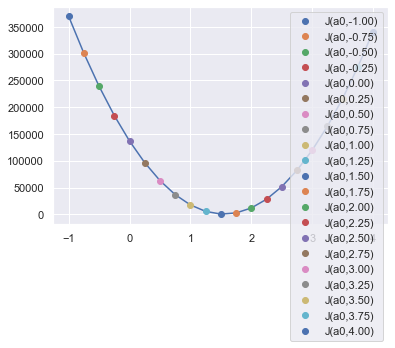

In [420]:
fig, ax = plt.subplots()
a = np.linspace(-1,4,21) ## 
ax.plot(a, J(-53.68,a,x,y,m=len(x)), c='C0')
for i in range(len(a1)):
    ax.plot(a1[i], J(-53.69,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.2f)' %a1[i])
plt.legend();

In [421]:
a

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
        1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
        3.5 ,  3.75,  4.  ])

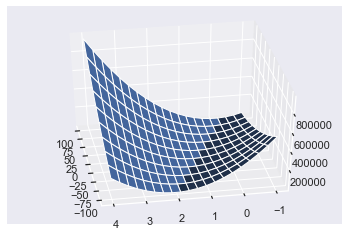

In [439]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-100,100,10)
a1 = np.linspace(-1,4,20)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
ax.view_init(40,170)

In [423]:
a0

array([-100.        ,  -77.77777778,  -55.55555556,  -33.33333333,
        -11.11111111,   11.11111111,   33.33333333,   55.55555556,
         77.77777778,  100.        ])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


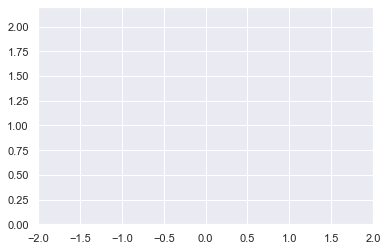

In [424]:
a0 = np.linspace(-2,2, 100)
a1 = np.linspace(0,2.2, 100)
#J(aa0,aa1,x,y,m=len(x))
aa0, aa1 = np.meshgrid(a0, a1)
plt.contour(aa0,aa1,J(aa0,aa1,x,y,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,3.75)])